<a href="https://colab.research.google.com/github/sofiafc17/Taller3-finanzas-computacionales-/blob/main/Taller_2_FC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TALLER 2 FINANZAS COMPUTACIONALES 

Integrantes

Sofia Feliciano Capera-
Julian Samuel Valero Murcia

1.La empresa XYZ produce dos productos: A y B. La ganancia por unidad de A es de 3 dólares y de B es de 5 dólares. Para su producción dispone de 500 unidades de materia prima, 1000 unidades de mano de obra y 2000 dólares de capital, de los cuales se
necesitan para producir una unidad de:

a.una unidad de materia prima, dos unidades de mano de obra y una unidad de capital.

b.una unidad de materia prima, cuatro unidades de mano de obra y dos unidades de
capital.

Además, se necesita producir al menos 100 unidades de A y 150 unidades de B para satisfacer la demanda del mercado.

Encuentre la asignación óptima de A y B que maximizan las ganancias de la empresa.
Para ello, formule un problema de LP utilizando Scipy.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import linprog

In [3]:
# Data
df = pd.DataFrame({' ' : ['Material', 'Labor', 'Capital'],
        'Product 1' : [1, 2, 2],
        'Product 2' : [1, 4, 2]})
df

,,Product 1,Product 2
0,Material,1,1
1,Labor,2,4
2,Capital,2,2


In [46]:
# Parametros de la función objetivo
c = np.array([3, 5])

# Restricciones de igualdad
A = np.array([[1, 1],
               [2,4],
                [1,2]])
                

b =np.array([5000,1000,2000])

bounds1= [(100,None),
          (150,None)]

# Solución del problema
res = linprog(-c, A_ub=A, b_ub=b,bounds=bounds1,method='revised simplex')
res
x_sol=pd.DataFrame(res.x)
print(round(x_sol,2))

       0
0  200.0
1  150.0


<ipython-input-46-6205ae2bf963>:16: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(-c, A_ub=A, b_ub=b,bounds=bounds1,method='revised simplex')


RTA:La empresa XYZ necesita producir 200 unidades del producto de A y 150 unidades del producto de B para maximizar las ganancias 

2.Usted desea invertir la suma de $100 millones en cuatro fondos que tienen diferentes retornos esperados (E(R)), así como diferentes ponderaciones en acciones de alto valor,gran tamaño y alta liquidez, como muestra la siguiente tabla:

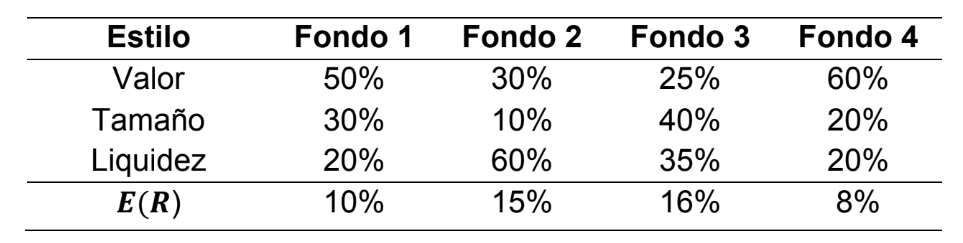

La asignación anterior debe contener al menos un 35% de acciones de alto valor, un 30% en tamaño y un 15% de acciones de liquidez. Encuentre una asignación factible con el retorno esperado más alto, bajo el supuesto de que solo se le permite mantener posiciones largas en los fondos.


In [48]:
# Data
df = pd.DataFrame({' ' : ['Valor', 'tamaño', 'liquidez'],
        'Fondo1' : [0.5,0.3,0.2],
        'Fondo2' : [0.3,0.1,0.6],
        'Fondo3' : [0.25,0.4,0.35],
        'Fondo4' : [0.6,0.2,0.2]})
df

,,Fondo1,Fondo2,Fondo3,Fondo4
0,Valor,0.5,0.3,0.25,0.6
1,tamaño,0.3,0.1,0.40,0.2
2,liquidez,0.2,0.6,0.35,0.2


In [5]:
# Parametros de la función objetivo
c2 = np.array([0.1, 0.15,0.16,0.8])

#igualdad
A2 = np.array([[1,1,1,1]])

b2 = np.array([100])

# Restricciones de igualdad

D = np.array([[0.5,0.3,0.25,0.6],
              [0.3,0.1,0.4,0.2],
              [0.2,0.6,0.35,0.2]])
d = np.array([35,30,35])

bounds2 = [(  0,  None)]

# Solución del problema
res2 = linprog(-c2,A_eq=A2, b_eq=b2,A_ub=D, b_ub=d,bounds = bounds2, method='revised simplex')
res2
x_sol=pd.DataFrame(res2.x)
print(round(x_sol,2))

       0
0   0.00
1  15.79
2  57.89
3  26.32


<ipython-input-5-661363f7fd84>:19: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res2 = linprog(-c2,A_eq=A2, b_eq=b2,A_ub=D, b_ub=d,bounds = bounds2, method='revised simplex')


In [6]:
import cvxpy as cp
n = 4
x = cp.Variable(n)
objetivo = cp.Minimize(-c2.T@x)
restricciones = [A2@x <= b2, D@x >= d, x>=0 ]
prob = cp.Problem(objetivo, restricciones)
result =prob.solve()
x_sol=pd.DataFrame(x.value)
print(round(x_sol,2))


       0
0   0.00
1  15.79
2  57.89
3  26.32


RTA: Al desarrollar el devido problema de optimizacion se llega a la conclusion de que al fondo 1 es mejor no invertir,el fondo 2 invertir 15,79,el fondo 3 invertir  57,89, el fondo 4 invertir 26,32 dando un total de 100.Esto con el fin de tener el mayor retorno

3.La empresa XYZ se enfrente al siguiente problema de manejo de efectivo. Las cifras están expresadas en millones ($).

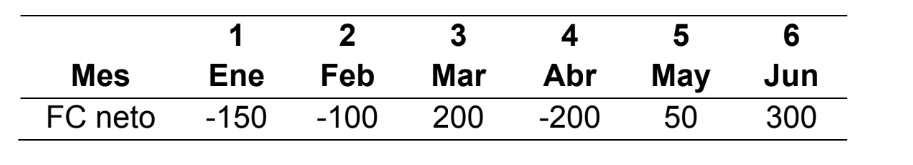


Además, se sabe que la empresa cuenta con las siguientes fuentes de recursos:

• Una línea de crédito de hasta $100 a una tasa de interés del 1% mensual.

• Puede emitir papel comercial a 90 días con un interés total del 2% por un período de 3 meses.

• Todos los meses se pueden invertir los fondos sobrantes a una tasa de interés del 0,3% mensual. Por ejemplo, la empresa podría hacer un depósito bancario que le reconoce esa tasa.

Sobre este problema, la empresa desea saber si: ¿usar la línea de crédito en algunos de los meses le representa un alto costo? si es así ¿cuándo debería usarla? ¿cuánto cuesta?¿qué pagos de intereses tendrá que hacer entre enero y junio? etc...

In [7]:
#funcion a optimizacion

c3 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1])

#funcion de igualdad
A3= np.array([[1,0,0,0,0,1, 0,0,-1, 0, 0, 0,0,0],
              [-1.01,1,0,0,0,0,1,0,1.003, -1, 0, 0,0,0],
              [0,-1.01,1,0,0,0,0,1,0, 1.003, -1, 0,0,0],
              [0,0,-1.01,1,0,-1.02,0,0,0, 0, 1.003, -1,0,0],
              [0,0,0,-1.01,1,0,-1.02,0,0, 0, 0, 1.003,-1,0],
              [0,0,0,0,-1.01,0,0,-1.02,0, 0, 0, 0,1.003,-1]])

b3 = np.array([150,100,-200,200,-50,-300])

#Bounds
bounds3 = [(0, 100),
            (0, 100),
            (0, 100),
            (0, 100),
            (0, 100), 
           (0,None),
           (0,None),
           (0,None),
           (0,None),
           (0,None),
           (0,None),
           (0,None),
           (0,None),
           (0,None)]
res3 = linprog(-c3, A_eq=A3, b_eq=b3, bounds=bounds3, method='revised simplex')
res3.x


<ipython-input-7-7dbfdef06ad8>:30: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res3 = linprog(-c3, A_eq=A3, b_eq=b3, bounds=bounds3, method='revised simplex')


array([  0.        ,  50.98039216,   0.        ,   0.        ,
         0.        , 150.        ,  49.01960784, 203.43436358,
         0.        ,   0.        , 351.9441675 ,   0.        ,
         0.        ,  92.49694915])

In [8]:
import cvxpy as cp
n = 14
x = cp.Variable(n)
objetivo = cp.Minimize(-c3@x)
restricciones = [A3@x == b3, x >= 0]
prob = cp.Problem(objetivo, restricciones)
prob.solve(solver=cp.GLPK_MI)

# Print result.

print(round(pd.DataFrame(x.value),2))

         0
0    -0.00
1    50.98
2    -0.00
3    -0.00
4    -0.00
5   150.00
6    49.02
7   203.43
8    -0.00
9    -0.00
10  351.94
11   -0.00
12   -0.00
13   92.50


RTA:La formulacion optima muestra que el mes de febrero es donde el credito genera mayor costo y que el saldo mayor es en Marzo contando con 352,94 con un saldo maximo de 92,49 en junio 


4.La empresa XYZ desea encontrar el saldo óptimo que debe mantener en su cuenta bancaria en un horizonte de un mes buscando maximizar su rentabilidad total. Se sabe que la empresa espera recibir entradas de efectivo de: $500 en la primera semana,300 en la segunda semana, 200 en la tercera semana y 400 en la cuarta semana. Todas las cifras se encuentran en millones de pesos. Además, la empresa debe realizar los siguientes pagos durante el mes: 350 en la primera semana, 400 en la segunda semana, 250 en la tercera semana y 200 en la cuarta semana y, para ello, debe mantener un saldo suficiente que respalde estas obligaciones.

Para aprovechar la rentabilidad que ofrecen los saldos en cada momento, la empresa puede invertir sus recursos en un instrumento a corto plazo en el que recibe un rendimiento del 0,02% por día, pero al realizar esta operación debe incurrir en un costo de transacción del 0,01% del monto transferido.

In [9]:
#funcion a optimizacion
c4= np.array ([0,0,0,0,0,0,0,1])


ren4= (1+0.0001)**7

#funcion de desigualdad

A4= np.array([[1,0,0,0,-1,0,0,0],
              [0,1,0,0,ren4,-1,0,0],
              [0,0,1,0,0,ren4,-1,0],
              [0,0,0,1,0,0,ren4,-1]])
b4= np.array([[150,-100,-50,200]])

#respuesta
res4= linprog(-c4,A_ub=A4,b_ub=-b4,method="revised simplex")
pd.DataFrame(res4.x).T

<ipython-input-9-0bfe57045246>:11: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res4= linprog(-c4,A_ub=A4,b_ub=-b4,method="revised simplex")


,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,150.0,50.105032,0.140116,200.140214


RTA: Al realizar el problema de optimizacion podemos concluir que se permite alcanzar una ganancia de 0.15 al finalizar el mes y por ello es necesario invertir todos los saldos.

5.La empresa XYZ tiene que decidir como distribuye su presupuesto $10.000 millones y la mano de obra (horas de trabajo) en tres departamentos: ventas, marketing y producción buscando maximizar sus ganancias. Para ello, se sabe que cada departamento le proporciona a la empresa las siguientes ganancias: ventas: 5, marketing: 8, y producción: 10. Esta asignación debe cumplir las siguientes restricciones:

i. El total de horas de trabajo disponibles es de 1.000.

ii. El departamento de ventas debe recibir al menos el 20% del presupuesto total.

iii. El departamento de marketing debe recibir al menos el 30% del total de horas detrabajo disponibles.

iv. El departamento de producción debe recibir al menos el 25% del total de horas de
trabajo disponibles.

In [10]:
#funcion a optimizacion
c5= np.array([0,0,0,5,8,10])

#funcion de desigualdad
A5= np.array([[0,0,0,1,0,0],
              [0,1,0,0,0,0],
              [0,0,1,0,0,0],
              [0,0,0,0,1,0],
              [0,0,0,0,0,1]])

b5= np.array([2000,300,250,2000,2000])

#funcion de igualdad

A6 = np.array([[1,1,1,0,0,0],
               [0,0,0,1,1,1]])
b6= np.array([1000,10000])

#solucion
res5=linprog(-c5,A_ub=-A5,b_ub=-b5,A_eq=A6,b_eq=b6,method="simplex")
pd.DataFrame(res5.x)

<ipython-input-10-cadb75dbb51a>:15: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res5=linprog(-c5,A_ub=-A5,b_ub=-b5,A_eq=A6,b_eq=b6,method="simplex")


,0
0,450.0
1,300.0
2,250.0
3,2000.0
4,2000.0
5,6000.0


RTA:La maximizacion recae en la ganancia y es por esto que el mayor presupuesto se da en los departamentos con mayor ganancia unitaria por tal razon el mayor presupuesto el cual es de 6000 es para la produccion y 2000 para las ventas y el marketing 

6.Considere una empresa con tres puntos potenciales para ubicar sus instalaciones (J = {1,2,3}) y cinco puntos de demanda que debe satisfacer (I = {1,2,3,4,5}). La apertura del punto j ∈ J tiene un costo fijo de funcionamiento fj, independientemente del volumen de ventas que maneje. Este volumen está limitado a una determinada cantidad máxima que puede manejarse anualmente (Mj). Además, hay un costo de transporte cij para ir desde el
punto j para abastecer la demanda en el punto i. Las siguientes tablas muestran los datos de demanda en cada punto:

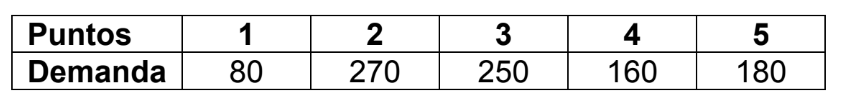

Y los costos de transporte, de funcionamiento y cantidad máxima que puede mantener en
cada

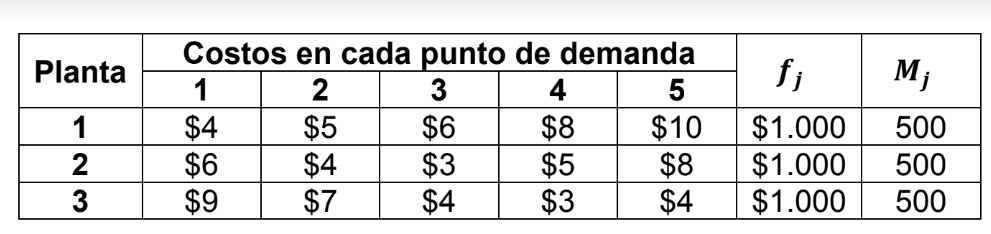

Las columnas 1-5 muestran el costo de transporte desde cada punto instalado (planta) a cada demanda que debe satisfacer. Las columnas fj y Mj muestran los costos fijos y la
capacidad máxima en cada ubicación. Encuentre la ubicación óptima para satisfacer las demandas de tal forma que se minimicen los costos.

In [37]:
import cvxpy as cp
C6 = np.array([[4,5,6,8,10], 
               [6,4,3,5,8], 
               [9,7,4,3,4]]) #Coeficientes función costos
F6 = np.array ([1000, 1000, 1000]) #Coeficientes Fj
D6 = np.array([80, 270, 250, 160, 180]) #Coeficientes demanda
M6 = np.array([500, 500, 500]) #Coeficientes Mj

x = cp.Variable((3,5), nonneg=True)
y = cp.Variable(3, boolean=True)

objetivo = cp.Minimize((cp.sum(cp.multiply(C6,x)) + cp.sum(cp.multiply(F6,y))))
restricciones = [cp.sum(x[0,:])<=M6[0],
                 cp.sum(x[1,:])<=M6[1],
                 cp.sum(x[2,:])<=M6[2],
                 cp.sum(x[:,0])==D6[0],
                 cp.sum(x[:,1])==D6[1],
                 cp.sum(x[:,2])==D6[2],
                 cp.sum(x[:,3])==D6[3],
                 cp.sum(x[:,4])==D6[4],
                 x[0,:]==0]

prob = cp.Problem(objetivo, restricciones)

result =prob.solve()

result =prob.solve()
x_sol=pd.DataFrame(x.value)
print(round(x_sol,2))

      0      1      2      3      4
0  -0.0   -0.0   -0.0   -0.0   -0.0
1  80.0  270.0  150.0   -0.0   -0.0
2  -0.0   -0.0  100.0  160.0  180.0


RTA: al realizar el problema de optimizacion se llega a la conclusion que las plantas 2 y 3 son la combinacion que minimiza los costos de funcionamiento y distribucion